In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# C:/Windows/Fonts/H2GSRB.TTF
import matplotlib as mp
import matplotlib.font_manager as fm
import os
# 한글폰트 - matplot lib 한글을 지원안하므로 자신의 컴에 있는 한글 폰트는 셋팅
location = 'C:/Windows/Fonts/H2GSRB.TTF'
font_name = fm.FontProperties(fname=location).get_name()
mp.rc('font',family=font_name)

<AxesSubplot:title={'center':'한글'}>

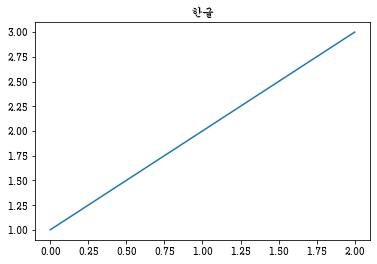

In [2]:
pd.Series([1,2,3]).plot(title='한글')

In [26]:
# 데이터 로드
df = pd.read_csv('전국도시공원정보표준데이터.csv',encoding='cp949')
df.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명
0,47190-00127,백현체육공원,체육공원,NaN,경상북도 구미시 산동면 백현리 79,36.186429,128.478491,90967.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-09,5080000,경상북도 구미시
1,47190-00128,둘모아공원,어린이공원,NaN,경상북도 구미시 봉곡동 584-2,36.148431,128.316594,4279.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-09,5080000,경상북도 구미시
2,47190-00129,다붓소공원,소공원,NaN,경상북도 구미시 봉곡동 765 일원,36.155883,128.311526,805.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-09,5080000,경상북도 구미시
3,47190-00130,다붓1공원,어린이공원,NaN,경상북도 구미시 봉곡동 457-1,36.156392,128.314372,1585.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-09,5080000,경상북도 구미시
4,47190-00131,다붓2공원,어린이공원,NaN,경상북도 구미시 봉곡동 767,36.154808,128.314372,1637.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-09,5080000,경상북도 구미시


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18400 entries, 0 to 18399
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          18400 non-null  object 
 1   공원명           18400 non-null  object 
 2   공원구분          18400 non-null  object 
 3   소재지도로명주소      5357 non-null   object 
 4   소재지지번주소       17916 non-null  object 
 5   위도            18207 non-null  float64
 6   경도            18200 non-null  float64
 7   공원면적          18400 non-null  float64
 8   공원보유시설(운동시설)  4978 non-null   object 
 9   공원보유시설(유희시설)  6574 non-null   object 
 10  공원보유시설(편익시설)  5315 non-null   object 
 11  공원보유시설(교양시설)  899 non-null    object 
 12  공원보유시설(기타시설)  2846 non-null   object 
 13  지정고시일         15997 non-null  object 
 14  관리기관명         17457 non-null  object 
 15  전화번호          17074 non-null  object 
 16  데이터기준일자       18400 non-null  object 
 17  제공기관코드        18400 non-null  object 
 18  제공기관명         18400 non-nu

<AxesSubplot:>

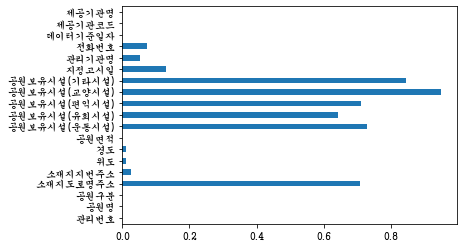

In [28]:
df.isna().mean().plot.barh()

In [29]:
remove_cols = df.columns[ df.isna().mean() > 0.5]
remove_cols = remove_cols[1:]
remove_cols

Index(['공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)'],
      dtype='object')

In [30]:
df2 =  df.drop(columns=remove_cols).copy()
df2.isna().mean()

관리번호        0.000000
공원명         0.000000
공원구분        0.000000
소재지도로명주소    0.708859
소재지지번주소     0.026304
위도          0.010489
경도          0.010870
공원면적        0.000000
지정고시일       0.130598
관리기관명       0.051250
전화번호        0.072065
데이터기준일자     0.000000
제공기관코드      0.000000
제공기관명       0.000000
dtype: float64

In [31]:
(df2['소재지지번주소'].isnull() & df2['소재지도로명주소'].notnull()).sum()

484

In [32]:
df2['소재지지번주소'] = df2['소재지지번주소'].fillna(df2['소재지도로명주소'])

In [33]:
df2.isnull().mean()

관리번호        0.000000
공원명         0.000000
공원구분        0.000000
소재지도로명주소    0.708859
소재지지번주소     0.000000
위도          0.010489
경도          0.010870
공원면적        0.000000
지정고시일       0.130598
관리기관명       0.051250
전화번호        0.072065
데이터기준일자     0.000000
제공기관코드      0.000000
제공기관명       0.000000
dtype: float64

In [34]:
df2.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명
0,47190-00127,백현체육공원,체육공원,NaN,경상북도 구미시 산동면 백현리 79,36.186429,128.478491,90967.0,NaN,NaN,NaN,2022-06-09,5080000,경상북도 구미시
1,47190-00128,둘모아공원,어린이공원,NaN,경상북도 구미시 봉곡동 584-2,36.148431,128.316594,4279.0,NaN,NaN,NaN,2022-06-09,5080000,경상북도 구미시
2,47190-00129,다붓소공원,소공원,NaN,경상북도 구미시 봉곡동 765 일원,36.155883,128.311526,805.0,NaN,NaN,NaN,2022-06-09,5080000,경상북도 구미시
3,47190-00130,다붓1공원,어린이공원,NaN,경상북도 구미시 봉곡동 457-1,36.156392,128.314372,1585.0,NaN,NaN,NaN,2022-06-09,5080000,경상북도 구미시
4,47190-00131,다붓2공원,어린이공원,NaN,경상북도 구미시 봉곡동 767,36.154808,128.314372,1637.0,NaN,NaN,NaN,2022-06-09,5080000,경상북도 구미시


In [78]:
df2['시도'] =  df2['제공기관명'].str.split(expand=True)[0]

In [79]:
df2['시도'].unique()

array(['경상북도', '울산광역시', '서울특별시', '경기도', '인천광역시', '강원도', '경상남도', '전라남도',
       '부산광역시', '대전광역시', '대구광역시', '제주특별자치도', '전라북도', '충청남도', '광주광역시',
       '충청북도', '부산관광공사', '인천시설공단', '울산시설공단', '세종특별자치시', '기장군도시관리공단'],
      dtype=object)

In [97]:
# 부산관광공사 , 기장군도시관리공단
df2[df2['시도'] == '부산관광공사']['시도'] = '부산광역시'

# df2['시도'] == '기장군도시관리공단'

C:\Users\user\AppData\Local\Temp\ipykernel_11360\3115052670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[df2['시도'] == '부산관광공사']['시도'] = '부산광역시'


In [99]:
df2[df2['시도'] == '기장군도시관리공단']['시도'] = '부산광역시'

C:\Users\user\AppData\Local\Temp\ipykernel_11360\1738551941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[df2['시도'] == '기장군도시관리공단']['시도'] = '부산광역시'


In [100]:
df2['시도'].unique()

array(['경상북도', '울산광역시', '서울특별시', '경기도', '인천광역시', '강원도', '경상남도', '전라남도',
       '부산광역시', '대전광역시', '대구광역시', '제주특별자치도', '전라북도', '충청남도', '광주광역시',
       '충청북도', '부산관광공사', '인천시설공단', '울산시설공단', '세종특별자치시', '기장군도시관리공단'],
      dtype=object)